# PREPROCESSING

# Librerias

In [238]:
# Datos
import numpy as np
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import folium 

# Preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from unidecode import unidecode

# inhabilita warnings
import warnings
warnings.filterwarnings("ignore")

# Load data

In [239]:
df = pd.read_csv('C:/Users/aalei/Desktop/Marzo 2024/ENTREGA2_COPY/data/telecom_churn_TRAINTEST.csv')
print('Rows: ', df.shape[0], '  Columns: ', df.shape[1])
df.head(2)

Rows:  90000   Columns:  100


,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002


In [240]:
dic = pd.read_csv('C:/Users/aalei/Desktop/Marzo 2024/ENTREGA2_COPY/data/variable_dictionary.csv')
pd.set_option('display.max_rows', None)
print('Variable description: ', '\n', 'Rows: ', dic.shape[0], '  Columns: ', dic.shape[1])
dic.head(100)

Variable description:  
 Rows:  100   Columns:  2


,Variable,Description
0,rev,Mean monthly revenue (charge amount)
1,mou,Mean number of monthly minutes of use
2,totmrc,Mean total monthly recurring charge
3,da,Mean number of directory assisted calls
4,ovrmou,Mean overage minutes of use
5,ovrrev,Mean overage revenue
6,vceovr,Mean revenue of voice overage
7,datovr,Mean revenue of data overage
8,roam,Mean number of roaming calls
9,change_mou,Percentage change in monthly minutes of use v...


# ML Preprocessing

In [241]:
# Checkear duplicados en Customer_ID
print('Duplicated rows in Customer_ID: ', df['Customer_ID'].duplicated().sum())

Duplicated rows in Customer_ID:  0


In [242]:
# Columna Customer_ID transformada a índice
df=df.set_index('Customer_ID')
print('Updated index to Customer_ID')
df.head(2)

Updated index to Customer_ID


,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,...,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,A,0.0,N,U,U,U,U,U,Y,361.0
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,A,0.0,Z,U,U,U,U,U,Y,240.0


## EDA: Exploratory Data Analysis

In [243]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rev,89866.0,58.312895,46.084103,-5.862500,33.027500,47.667500,70.193750,3843.262500
mou,89866.0,504.277946,516.170057,0.000000,148.500000,349.000000,689.000000,12206.750000
totmrc,89866.0,45.880669,23.370435,-26.915000,30.000000,44.990000,59.990000,409.990000
da,89866.0,0.877813,2.173665,0.000000,0.000000,0.247500,0.742500,159.390000
ovrmou,89866.0,40.798976,96.970619,0.000000,0.000000,2.500000,41.250000,4320.750000
ovrrev,89866.0,13.289932,30.123282,0.000000,0.000000,0.900000,13.912500,1102.400000
vceovr,89866.0,13.046046,29.719581,0.000000,0.000000,0.600000,13.562500,896.087500
datovr,89866.0,0.240786,3.012631,0.000000,0.000000,0.000000,0.000000,423.540000
roam,89866.0,1.308197,15.374215,0.000000,0.000000,0.000000,0.257500,3685.200000
change_mou,89405.0,-13.786987,271.624916,-3875.000000,-85.750000,-6.500000,61.250000,31219.250000


### 1. Target Distribution

In [244]:
target = 'churn'
features = df.columns[df.columns!=target]
X = df[features]
y = df[target]

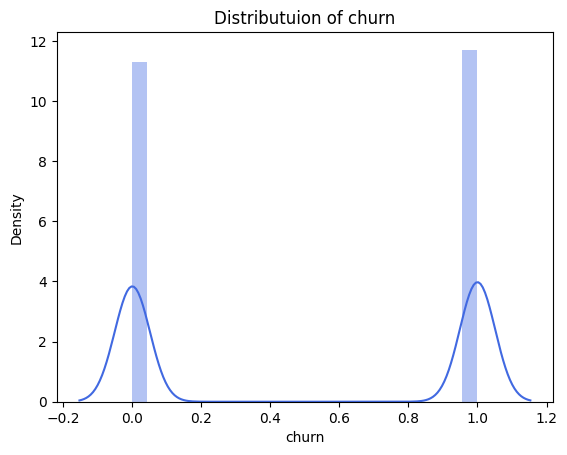

In [245]:
sns.distplot(y, color='#4169E1')
plt.title('Distributuion of '+ target)
plt.show()

### 2. Univariable Analisys

In [246]:
# Clasificar variables en numéricas y categóricas
var_cat = df.select_dtypes(include=['object']).columns.tolist()
var_num = df.select_dtypes(include=['int','float']).columns.tolist()
print('Total var_cat:', len(var_cat), '   Total var_num:', len(var_num), '    Total variables:', len(var_cat)+len(var_num))

Total var_cat: 21    Total var_num: 78     Total variables: 99


In [247]:
# Para las visualizaciones utilizamos una muestra random del ds
df_sample=df.sample(1000, random_state=42)

*Variables Categóricas*

In [248]:
'''num_cols = 3
num_plots = len(var_cat) 
num_rows = (num_plots - 1) // num_cols + 1 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(23, num_rows * 5)) 

for i, var in enumerate(var_cat):
    row, col = i // num_cols, i % num_cols
    sns.histplot(x=var, data=df_sample, ax=axes[row, col], color = '#4169E1')  
    axes[row, col].set_title('Distribución: ' + var)

plt.tight_layout() 
plt.show()'''

"num_cols = 3\nnum_plots = len(var_cat) \nnum_rows = (num_plots - 1) // num_cols + 1 \nfig, axes = plt.subplots(num_rows, num_cols, figsize=(23, num_rows * 5)) \n\nfor i, var in enumerate(var_cat):\n    row, col = i // num_cols, i % num_cols\n    sns.histplot(x=var, data=df_sample, ax=axes[row, col], color = '#4169E1')  \n    axes[row, col].set_title('Distribución: ' + var)\n\nplt.tight_layout() \nplt.show()"

In [249]:
# Value counts para categóricas
for i in var_cat:
    print(df[i].value_counts(), '\n')

new_cell
U    58812
Y    18114
N    13074
Name: count, dtype: int64 

crclscod
AA    34152
A     15602
BA    11270
CA     7389
EA     5521
B      3743
DA     3201
ZA     3177
C      1418
A2      771
U       429
E       330
E4      305
GA      265
D       244
G       236
I       231
JF      192
Z       187
J       169
M       153
C2      152
D4      107
Z4       94
K        93
W        84
V1       70
U1       56
EM       46
B2       42
Y        38
EC       32
O        24
CY       21
E2       19
CC       19
D5       16
C5       14
IF       14
ZY       12
Z1       11
Z5        8
H         8
TP        5
D2        5
GY        5
L         4
EF        4
Z2        4
A3        3
P1        2
S         1
V         1
ZF        1
Name: count, dtype: int64 

asl_flag
N    79401
Y    10599
Name: count, dtype: int64 

prizm_social_one
S    29203
U    20935
C    15244
T    13705
R     4376
Name: count, dtype: int64 

area
NEW YORK CITY AREA               10293
DC/MARYLAND/VIRGINIA AREA         5924
MID

*Variables Numéricas*

In [250]:
'''num_cols = 6
num_plots = len(var_num) 
num_rows = (num_plots - 1) // num_cols + 1 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(23, num_rows * 5)) 

for i, var in enumerate(var_num):
    row, col = i // num_cols, i % num_cols
    sns.histplot(x=var, data=df_sample, ax=axes[row, col], color ='#4169E1')
    axes[row, col].set_title('Distribución: ' + var)

plt.tight_layout() 
plt.show()'''

"num_cols = 6\nnum_plots = len(var_num) \nnum_rows = (num_plots - 1) // num_cols + 1 \nfig, axes = plt.subplots(num_rows, num_cols, figsize=(23, num_rows * 5)) \n\nfor i, var in enumerate(var_num):\n    row, col = i // num_cols, i % num_cols\n    sns.histplot(x=var, data=df_sample, ax=axes[row, col], color ='#4169E1')\n    axes[row, col].set_title('Distribución: ' + var)\n\nplt.tight_layout() \nplt.show()"

### Analisys Variable-Target

* Relacion target-variable

*Variables categóricas y target*

In [251]:
'''n_rows = 7
n_cols = 3
sns.set()
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 40))

for i, var in enumerate(var_cat):
    row = i // n_cols
    col = i % n_cols
    sns.countplot(x=var, hue='churn', data=df_sample, ax=axes[row, col])
    axes[row, col].set_title(f'{var} vs Churn')

plt.tight_layout()
plt.show()'''

"n_rows = 7\nn_cols = 3\nsns.set()\nfig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 40))\n\nfor i, var in enumerate(var_cat):\n    row = i // n_cols\n    col = i % n_cols\n    sns.countplot(x=var, hue='churn', data=df_sample, ax=axes[row, col])\n    axes[row, col].set_title(f'{var} vs Churn')\n\nplt.tight_layout()\nplt.show()"

*Variables numéricas y target*

In [252]:
'''n_rows = 26
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 60))

for i, var in enumerate(var_num):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(x=var, hue='churn', data=df_sample, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'{var} vs Churn')

plt.tight_layout()
plt.show()'''

"n_rows = 26\nn_cols = 3\nfig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 60))\n\nfor i, var in enumerate(var_num):\n    row = i // n_cols\n    col = i % n_cols\n    sns.histplot(x=var, hue='churn', data=df_sample, kde=True, ax=axes[row, col])\n    axes[row, col].set_title(f'{var} vs Churn')\n\nplt.tight_layout()\nplt.show()"

# Data Cleaning

* Eliminar filas sin target informado.

In [253]:
# Filas sin target informado
print(df['churn'].isnull().sum(), ' non-informed rows in target were deleted')
print('N° Rows: ',df.shape[0], '  Columns: ', df.shape[1])

0  non-informed rows in target were deleted
N° Rows:  90000   Columns:  99


* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)

In [254]:
# Check duplicados
print(df.duplicated().sum(), 'duplicated rows were deleted')
df.drop_duplicates(inplace=True)
print('N° Rows: ',df.shape[0], '  Columns: ', df.shape[1])

0 duplicated rows were deleted
N° Rows:  90000   Columns:  99


* Eliminar filas/columnas vacías y columnas irrelevantes

In [255]:
# Checkear columnas que tengan un valor único
list_unique=[]
for column in df.columns:
    unique_values = df[column].nunique(dropna=True)
    if unique_values == 1:
        list_unique.append(column)
        print(f"{column} has an unique value: {df[column].dropna().iloc[0]}")

infobase has an unique value: M


In [256]:
# Eliminar columnas con valor único 
df = df.drop(columns=list_unique)
print(f'Columns {list_unique} were deleted')
var_cat = df.select_dtypes(include=['object']).columns.tolist()
var_num = df.select_dtypes(include=['int','float']).columns.tolist()
print('Total var_cat:', len(var_cat), '   Total var_num:', len(var_num), '    Total variables:', len(var_cat)+len(var_num))
print('N° Rows: ',df.shape[0], '  Columns: ', df.shape[1])

Columns ['infobase'] were deleted
Total var_cat: 20    Total var_num: 78     Total variables: 98
N° Rows:  90000   Columns:  98


* Corregir data types incorrectos

In [257]:
# Para que todo lo que entren (datos del test, datos nuevos tengan las mismas características), Eliminar los tildes:
df[var_cat] = df[var_cat].apply(lambda x: x.apply(lambda y: unidecode(y) if isinstance(y, str) else y))
print('Accent mark deleted', '\n')

# Transformar todos los str a letras mayúsculas
df[var_cat] = df[var_cat].apply(lambda x: x.str.upper() if x.dtype == 'O' else x)
print('Transformed to uppercase', '\n')

# Eliminar ' area' al final de cada string en la columna area
df['area'] = df['area'].str.replace(' AREA', '')
print('AREA word removed', '\n')

# Cambiar 'UNKW' por 'UNKNOWN', ya que este será un valor a imputar en nulos posteriormente
df['hnd_webcap'] = df['hnd_webcap'].replace('UNKW','UNKNOWN')
print('UNKNOWN instead UNKW in hnd_webcap category', '\n')

# Reemplazar la categoría 'T' por 'U' en la variable dualband
df['dualband'] = df['dualband'].str.replace('T', 'U')
print('U instead T in dualband category', '\n')

Accent mark deleted 

Transformed to uppercase 

AREA word removed 

UNKNOWN instead UNKW in hnd_webcap category 

U instead T in dualband category 



* Corregir data numéricos no lógicos (negativos)

In [258]:
tabla_filas = []

# Iterar sobre las variables numéricas
for columna in var_num:
    minimo = df[columna].min()
    if minimo < 0:
        maximo = df[columna].max()

        # Obtener la cantidad de valores negativos en la variable
        cantidad_negativos = df[df[columna] < 0][columna].count()

        tabla_filas.append([columna, maximo, minimo, cantidad_negativos])

# Crear DataFrame con los resultados
df_resultado = pd.DataFrame(tabla_filas, columns=['Variable', 'Máximo', 'Mínimo', 'Cantidad_Negativos'])
print(df_resultado)

     Variable      Máximo     Mínimo  Cantidad_Negativos
0         rev   3843.2625    -5.8625                   4
1      totmrc    409.9900   -26.9150                  21
2  change_mou  31219.2500 -3875.0000               48547
3  change_rev   9963.6575 -1107.7400               50943
4     avg6rev    866.0000    -2.0000                   3
5     eqpdays   1812.0000    -5.0000                 102


In [259]:
negative_to_drop = ['rev','totmrc','avg6rev','eqpdays']
for i in negative_to_drop:
    df = df.drop(df[df[i] < 0].index)
    
print("Min rev: ",df['rev'].min(), "Min totmrc: ", df['totmrc'].min(),"Min avg6rev: ", df['avg6rev'].min(), "Min eqpdays: ", df['eqpdays'].min())

Min rev:  0.0 Min totmrc:  0.0 Min avg6rev:  2.0 Min eqpdays:  0.0


# Imputación de nulos

In [260]:
# Valores nulos
porcentaje_nulos = (df[(df.columns[df.isnull().any()])].isnull().sum() / len(df)) * 100
print(f'{len(porcentaje_nulos)} Columns with null values. Maximun Null values percentaje per column:{porcentaje_nulos.max().round()}%')

42 Columns with null values. Maximun Null values percentaje per column:48.0%


In [261]:
df.isnull().sum()

rev                   134
mou                   134
totmrc                134
da                    134
ovrmou                134
ovrrev                134
vceovr                134
datovr                134
roam                  134
change_mou            588
change_rev            588
drop_vce                0
drop_dat                0
blck_vce                0
blck_dat                0
unan_vce                0
unan_dat                0
plcd_vce                0
plcd_dat                0
recv_vce                0
recv_sms                0
comp_vce                0
comp_dat                0
custcare                0
ccrndmou                0
cc_mou                  0
inonemin                0
threeway                0
mou_cvce                0
mou_cdat                0
mou_rvce                0
owylis_vce              0
mouowylisv              0
iwylis_vce              0
mouiwylisv              0
peak_vce                0
peak_dat                0
mou_peav                0
mou_pead    

In [262]:
nulls_to_drop = ['truck','rev','change_mou','avg6mou','phones','area']
for i in nulls_to_drop:
    df = df.dropna(subset=[i])


*Manejo de Nulos en Variables categóricas*

In [263]:
df[var_cat].isnull().sum()

new_cell                0
crclscod                0
asl_flag                0
prizm_social_one     5784
area                    0
dualband                0
refurb_new              0
hnd_webcap           9252
ownrent             27200
dwlltype            25716
marital                 0
HHstatin            30632
dwllsize            31383
ethnic                  0
kid0_2                  0
kid3_5                  0
kid6_10                 0
kid11_15                0
kid16_17                0
creditcd                0
dtype: int64

In [264]:
# Descripción de variables categóricas
pd.set_option('display.max_rows', None)
dic[dic['Variable'].isin(var_cat)]

,Variable,Description
52,new_cell,New cell phone user
53,crclscod,Credit class code
54,asl_flag,Account spending limit
70,prizm_social_one,Social group letter only
71,area,Geogrpahic area
72,dualband,Dualband
73,refurb_new,Handset: refurbished or new
77,hnd_webcap,Handset web capability
80,ownrent,Home owner/renter status
82,dwlltype,Dwelling Unit type


In [265]:
# Se imputan los nulos como 'UNKNOWN'
var_cat = df.select_dtypes(include=['object']).columns.tolist()
for i in var_cat:
    df[i].fillna('UNKNOWN', inplace=True)
print('Null values transformed to UNKNOWN')

Null values transformed to UNKNOWN


*Manejo de Nulos en Variables Numéricas*

In [266]:
# Check Valores nulos
porcentaje_nulos = (df[(df.columns[df.isnull().any()])].isnull().sum() / len(df)) * 100
print(f'{len(porcentaje_nulos)} Columns with null values. Maximun Null values percentaje per column:{porcentaje_nulos.max().round()}%')
df[var_num].isnull().sum()[df[var_num].isnull().sum()>0].sort_values(ascending=False)

5 Columns with null values. Maximun Null values percentaje per column:47.0%


numbcars     40965
lor          24287
income       20076
adults       17980
hnd_price      636
dtype: int64

In [267]:
# Columnas numéricas se reemplazan con -999
for i in var_num:
   df[i].fillna(-999, inplace = True)
print(f'{len(porcentaje_nulos)} columns with null values were updated. Null values were replaced by -999')

5 columns with null values were updated. Null values were replaced by -999


In [268]:
# Check Nulos
df.isnull().sum().sum()

0

# Feature engineering

In [269]:
# Se agrupan las columnas kids in num_kids
list_to_kids=['kid0_2','kid3_5','kid6_10','kid11_15','kid16_17']
for i in list_to_kids:
    df[i] = df[i].replace({'U': 0, 'Y': 1})

df['num_kids'] = df[list_to_kids].sum(axis=1)

drop_cols = list(set(list_to_kids))
df.drop(columns=drop_cols, inplace=True)   

In [270]:
var_cat = df.select_dtypes(include=['object']).columns.tolist()
var_num = df.select_dtypes(include=['int','float']).columns.tolist()
print('Total var_cat:', len(var_cat), '   Total var_num:', len(var_num), '    Total variables:', len(var_cat)+len(var_num))

Total var_cat: 15    Total var_num: 79     Total variables: 94


In [271]:
# Agrupar categorias en las variables categoricas
#Dejar la variable Credit class code todas con una sola letra
df['crclscod'] = df['crclscod'].apply(lambda x: x[0] if x else x)
print('crslscod modify to one letter instead two', '\n')

list_to_group = ['ethnic','crclscod']
for i in list_to_group:
    counts = df[i].value_counts(dropna=True)
    categorias_a_agrupar = counts[counts < 1000].index
    df[i] = df[i].apply(lambda x: 'OTHER' if x in categorias_a_agrupar and not pd.isna(x) else x)
    print(f'This categories were grouped for {i}: {categorias_a_agrupar}')

crslscod modify to one letter instead two 

This categories were grouped for ethnic: Index(['R', 'D', 'M', 'P', 'X'], dtype='object', name='ethnic')
This categories were grouped for crclscod: Index(['G', 'U', 'J', 'M', 'I', 'W', 'V', 'O', 'K', 'Y', 'H', 'T', 'P'], dtype='object', name='crclscod')


In [272]:
# Value counts para categóricas
for i in var_cat:
    print(df[i].value_counts(), '\n')

new_cell
U    56284
Y    17513
N    12680
Name: count, dtype: int64 

crclscod
A        49129
B        14478
C         8642
E         5934
D         3378
Z         3327
OTHER     1589
Name: count, dtype: int64 

asl_flag
N    76713
Y     9764
Name: count, dtype: int64 

prizm_social_one
S          28261
U          20220
C          14673
T          13287
UNKNOWN     5784
R           4252
Name: count, dtype: int64 

area
NEW YORK CITY               9930
MIDWEST                     5666
DC/MARYLAND/VIRGINIA        5652
CALIFORNIA NORTH            5300
ATLANTIC SOUTH              5294
DALLAS                      4950
NEW ENGLAND                 4896
SOUTHWEST                   4804
CHICAGO                     4573
LOS ANGELES                 4361
GREAT LAKES                 4128
OHIO                        4115
NORTHWEST/ROCKY MOUNTAIN    3844
NORTH FLORIDA               3820
CENTRAL/SOUTH TEXAS         3783
HOUSTON                     3718
SOUTH FLORIDA               3002
TENNESSEE       

### Tratamiento de outlayers

In [273]:
for i in var_cat:
  print(f'{i} :  {df[i].unique()}')

new_cell :  ['U' 'N' 'Y']
crclscod :  ['A' 'E' 'C' 'B' 'D' 'OTHER' 'Z']
asl_flag :  ['N' 'Y']
prizm_social_one :  ['S' 'U' 'T' 'C' 'UNKNOWN' 'R']
area :  ['NORTHWEST/ROCKY MOUNTAIN' 'CHICAGO' 'GREAT LAKES' 'NEW ENGLAND' 'DALLAS'
 'CENTRAL/SOUTH TEXAS' 'TENNESSEE' 'MIDWEST' 'PHILADELPHIA' 'OHIO'
 'HOUSTON' 'SOUTHWEST' 'NEW YORK CITY' 'ATLANTIC SOUTH' 'SOUTH FLORIDA'
 'CALIFORNIA NORTH' 'DC/MARYLAND/VIRGINIA' 'NORTH FLORIDA' 'LOS ANGELES']
dualband :  ['Y' 'N' 'U']
refurb_new :  ['N' 'R']
hnd_webcap :  ['WCMB' 'WC' 'UNKNOWN']
ownrent :  ['O' 'UNKNOWN' 'R']
dwlltype :  ['S' 'M' 'UNKNOWN']
marital :  ['S' 'M' 'A' 'U' 'B']
HHstatin :  ['C' 'I' 'UNKNOWN' 'B' 'A' 'G' 'H']
dwllsize :  ['A' 'D' 'O' 'UNKNOWN' 'E' 'J' 'C' 'B' 'I' 'N' 'K' 'G' 'H' 'L' 'M' 'F']
ethnic :  ['N' 'Z' 'U' 'I' 'S' 'F' 'J' 'OTHER' 'H' 'G' 'O' 'B']
creditcd :  ['Y' 'N']


* Variables asl_flag y newcell, se cambian a booleanos

In [274]:
# Si tienen unicamente 2 clases, N: 0, Y: 1 y U or UNKNOWN: -999
mapeo_asl = {'N': 0, 'Y': 1}
df['asl_flag'] = df['asl_flag'].replace(mapeo_asl)
print(f'Unique values for asl_flag: {df['asl_flag'].unique()}')

mapeo_newcell = {'N': 0, 'Y': 1, 'U': -999}
df['new_cell'] = df['new_cell'].replace(mapeo_newcell)
print(f'Unique values for new_cell: {df['new_cell'].unique()}')

Unique values for asl_flag: [0 1]
Unique values for new_cell: [-999    0    1]


In [275]:
# Actualizar variables en numérica y categóricas
var_cat = df.select_dtypes(include=['object']).columns.tolist()
var_num = df.select_dtypes(include=['int', 'float']).columns.tolist()
print('Total var_cat:', len(var_cat), '   Total var_num:', len(var_num), '    Total variables:', len(var_cat)+len(var_num))

Total var_cat: 13    Total var_num: 81     Total variables: 94


* One Hot Encoding en resto de categoricos

In [276]:
# onehotencoding
df = pd.get_dummies(df, columns=var_cat)
print('Rows: ', df.shape[0], '  Columns: ', df.shape[1])

Rows:  86477   Columns:  169


In [277]:
df.head(3)

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,...,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_OTHER,ethnic_S,ethnic_U,ethnic_Z,creditcd_N,creditcd_Y
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,False,False,True,False,False,False,False,False,False,True
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,False,False,False,False,False,False,False,True,False,True
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,False,False,True,False,False,False,False,False,False,True


# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas

* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

In [278]:
columns_to_drop = ['drop_dat','blck_dat', 'unan_dat', 'recv_sms', 'peak_dat', 'mou_pead', 'callfwdv','rv']
df.drop(columns=columns_to_drop, inplace=True)

In [279]:
#Set target
target = 'churn'
features = df.columns[df.columns!=target]
X = df[features]
y = df[target]

In [280]:
# Eliminar variables altamente correlacionadas
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z.loc[Z['corr_F1_target'] < Z['corr_F2_target'], 'F_to_delete'] = Z.loc[Z['corr_F1_target'] < Z['corr_F2_target'], 'F1']

    return Z

In [281]:
highly_corr = highly_correlated(X,y,0.95)
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,ovrrev,ovrmou,0.956755,0.020463,0.015194,ovrmou
1,vceovr,ovrmou,0.954061,0.020595,0.015194,ovrmou
2,vceovr,ovrrev,0.994851,0.020595,0.020463,ovrrev
3,comp_vce,plcd_vce,0.985600,0.050400,0.046790,plcd_vce
4,comp_dat,plcd_dat,0.990396,0.007299,0.007458,comp_dat
5,cc_mou,ccrndmou,0.988701,0.033278,0.034850,cc_mou
6,inonemin,recv_vce,0.965925,0.033768,0.041325,inonemin
7,mou_opkd,mou_cdat,0.960188,0.008290,0.008827,mou_opkd
8,attempt,plcd_vce,0.998527,0.046899,0.046790,plcd_vce
9,attempt,comp_vce,0.984221,0.046899,0.050400,attempt


In [282]:
# Eliminamos las features altamente correlacionadas
drop_cols = list(set(highly_corr['F_to_delete']))
df.drop(columns=drop_cols, inplace=True)
print(f'Eliminadas {len(drop_cols)} columnas altamente correlacionadas:{drop_cols}')
print('N° Rows: ',df.shape[0], '  Columns: ', df.shape[1])


Eliminadas 18 columnas altamente correlacionadas:['avg6mou', 'avg6qty', 'comp_dat', 'avg3mou', 'plcd_vce', 'totcalls', 'cc_mou', 'ovrrev', 'creditcd_N', 'inonemin', 'totrev', 'ownrent_UNKNOWN', 'ovrmou', 'mou_opkd', 'totmou', 'refurb_new_N', 'comp_vce', 'attempt']
N° Rows:  86477   Columns:  143


# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [283]:
target = 'churn'
features = df.columns[df.columns!=target]
X = df[features]
y = df[target]

# Eliminamos columnas practicamente constantes (nula varianza)
vt = VarianceThreshold(threshold = 0.01)#0.01 es el umbral minimo de varianza y filtra las varianzas inferiores
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
df.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())
print('N° Rows: ',df.shape[0], '  Columns: ', df.shape[1])

10  low variance features were removed:
 ['HHstatin_H', 'dwllsize_D', 'dwllsize_E', 'dwllsize_F', 'dwllsize_G', 'dwllsize_H', 'dwllsize_I', 'dwllsize_K', 'dwllsize_L', 'dwllsize_M']
N° Rows:  86477   Columns:  133


# Guardar clean data

* Guardar en data path y mostrar el resultado en un head()

In [284]:
df.head(2)

,rev,mou,totmrc,da,vceovr,datovr,roam,change_mou,change_rev,drop_vce,...,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_OTHER,ethnic_S,ethnic_U,ethnic_Z,creditcd_Y
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.0,0.0,0.0,-157.25,-18.9975,0.666667,...,False,False,False,True,False,False,False,False,False,True
1000002,57.4925,482.75,37.425,0.2475,9.1,0.0,0.0,532.25,50.9875,8.333333,...,False,False,False,False,False,False,False,False,True,True


In [285]:
df.to_csv('C:/Users/aalei/Desktop/Marzo 2024/ENTREGA2_COPY/model/df_clean.csv')